In [10]:
#imports
import pandas as pd
import csv
from PIL import Image
import matplotlib.pyplot as plt
import math


In [11]:
def display_images_info(csv_file, image_folder, image_ids):
    # Prepare a dictionary to store the image information
    image_info_dict = {}
    
    # Read the CSV file and store information for the specified image_ids
    try:
        with open(csv_file, mode='r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                if row['ImageID'] in image_ids:
                    image_info_dict[row['ImageID']] = {
                        'Labels': row['Labels'],
                        'Caption': row['Caption']
                    }
                    # If we have found all the image_ids, we can stop reading the file
                    if len(image_info_dict) == len(image_ids):
                        break
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return
    
    # Determine the grid size
    num_images = len(image_ids)
    cols = min(3, num_images)  # Adjust the number of columns as needed
    rows = math.ceil(num_images / cols)

    # Create the plot
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    axes = axes.flatten()

    for idx, image_id in enumerate(image_ids):
        if image_id in image_info_dict:
            image_path = f"{image_folder}/{image_id}"
            labels = image_info_dict[image_id]['Labels']
            caption = image_info_dict[image_id]['Caption']

            # Display the image
            try:
                img = Image.open(image_path)
                axes[idx].imshow(img)
                axes[idx].axis('off')  # Hide the axes
                axes[idx].set_title(f"Labels: {labels}\nCaption: {caption}")
            except FileNotFoundError:
                axes[idx].text(0.5, 0.5, f"Image {image_id} not found", 
                               horizontalalignment='center', 
                               verticalalignment='center')
                axes[idx].axis('off')
        else:
            axes[idx].text(0.5, 0.5, f"Image {image_id} not found in CSV", 
                           horizontalalignment='center', 
                           verticalalignment='center')
            axes[idx].axis('off')
    
    # Hide any remaining empty subplots
    for j in range(idx + 1, rows * cols):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

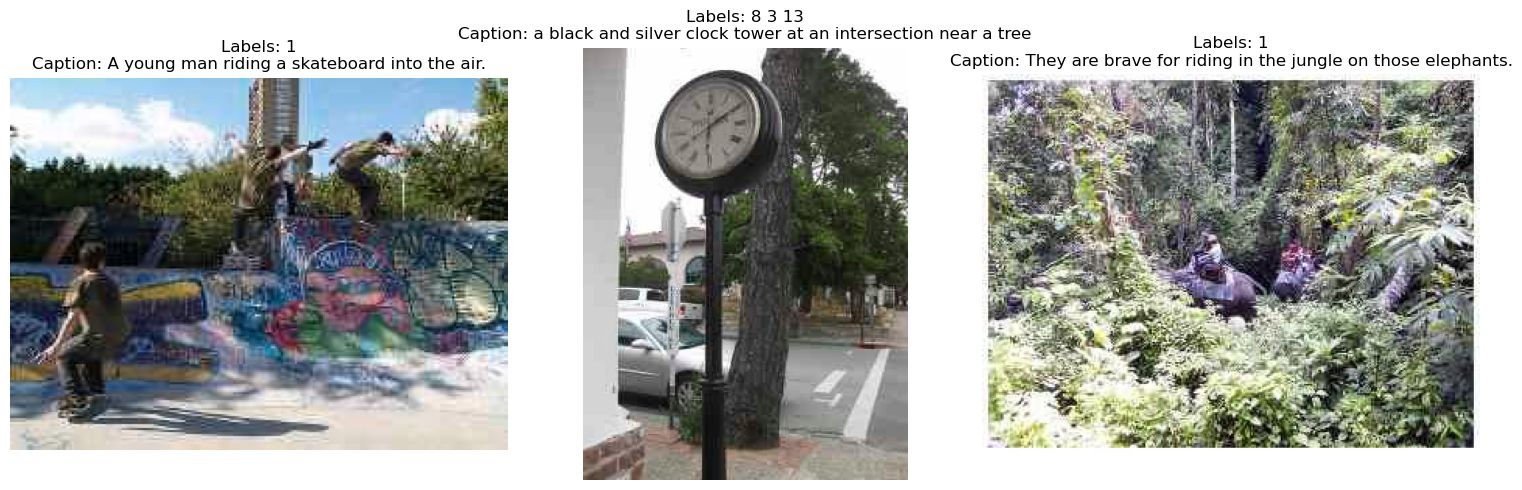

In [20]:
csv_file = 'data/train.csv'
image_folder = 'data'
image_ids = ['5.jpg', '3.jpg', '2.jpg']
display_images_info(csv_file, image_folder, image_ids)
